## Final Project Submission

Please fill out:
* Student name: Joan Awuor Owuor
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Maryann Mwikali
* Blog post URL:


In [98]:
import pandas as pd
import numpy as np
import csv

In [99]:
df = pd.read_csv(r'C:\Users\pc\Downloads\dsc-phase-1-project-v2-3\zippedData\bom.movie_gross.csv.gz')

In [100]:
df.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


Check if the boom.movie_gross.csv is ready for analysis

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [102]:
df.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [103]:
null_values_studio = df[df['studio'].isnull()]
null_values_studio

,title,studio,domestic_gross,foreign_gross,year
210,Outside the Law (Hors-la-loi),NaN,96900.0,3300000,2010
555,Fireflies in the Garden,NaN,70600.0,3300000,2011
933,Keith Lemon: The Film,NaN,NaN,4000000,2012
1862,Plot for Peace,NaN,7100.0,NaN,2014
2825,Secret Superstar,NaN,NaN,122000000,2017


In [104]:

studios = df['studio'].nunique()
studios


257

In [105]:
years = df['year'].unique()
years

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

In [106]:
df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [107]:
null_values_domesticgross = df[df['domestic_gross'].isnull()]
null_values_domesticgross

,title,studio,domestic_gross,foreign_gross,year
230,It's a Wonderful Afterlife,UTV,NaN,1300000,2010
298,Celine: Through the Eyes of the World,Sony,NaN,119000,2010
302,White Lion,Scre.,NaN,99600,2010
306,Badmaash Company,Yash,NaN,64400,2010
327,Aashayein (Wishes),Relbig.,NaN,3800,2010
537,Force,FoxS,NaN,4800000,2011
713,Empire of Silver,NeoC,NaN,19000,2011
871,Solomon Kane,RTWC,NaN,19600000,2012
928,The Tall Man,Imag.,NaN,5200000,2012
933,Keith Lemon: The Film,NaN,NaN,4000000,2012


Check for outliers in the domestic_gross column

In [115]:
cleaned_df = df.dropna(subset=['domestic_gross'])

mean = cleaned_df['domestic_gross'].mean()
std_dev = cleaned_df['domestic_gross'].std()

threshold = 3

lower_bound = mean - threshold * std_dev
upper_bound = mean + threshold * std_dev

outliers = cleaned_df[(cleaned_df['domestic_gross'] < lower_bound) | (cleaned_df['domestic_gross'] > upper_bound)]

print("Outliers in 'domestic_gross' column using standard deviation:")
print(outliers)


Outliers in 'domestic_gross' column using standard deviation:
                                            title studio  domestic_gross  \
0                                     Toy Story 3     BV     415000000.0   
1                      Alice in Wonderland (2010)     BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                       Inception     WB     292600000.0   
4                             Shrek Forever After   P/DW     238700000.0   
...                                           ...    ...             ...   
3081               Jurassic World: Fallen Kingdom   Uni.     417700000.0   
3082                                Incredibles 2     BV     608600000.0   
3083                                      Aquaman     WB     335100000.0   
3087                                   Deadpool 2    Fox     318500000.0   
3096                 Dr. Seuss' The Grinch (2018)   Uni.     270600000.0   

      foreign_gross  year

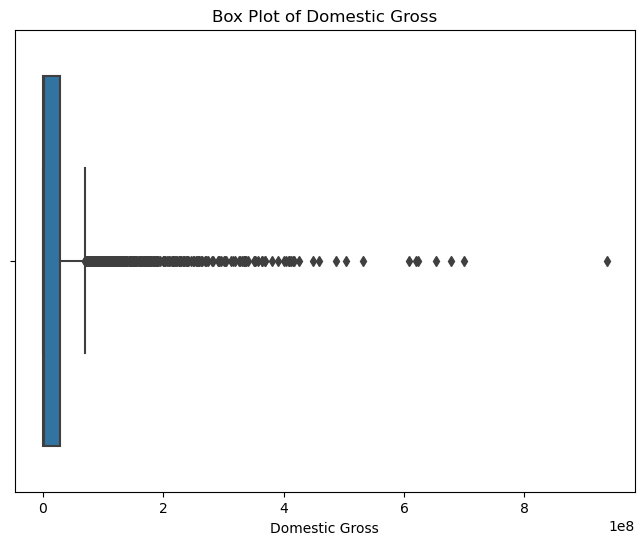

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

cleaned_df = df.dropna(subset=['domestic_gross'])

plt.figure(figsize=(8, 6))
sns.boxplot(x=cleaned_df['domestic_gross'])
plt.title('Box Plot of Domestic Gross')
plt.xlabel('Domestic Gross')
plt.show()


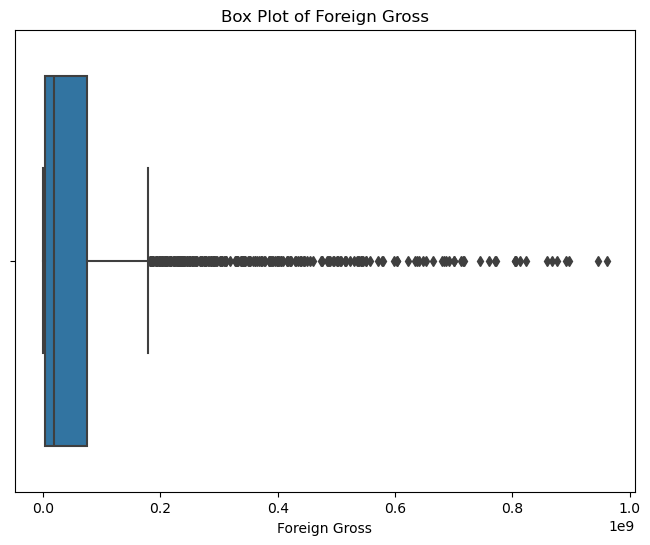

In [117]:
df['foreign_gross'] = pd.to_numeric(df['foreign_gross'], errors='coerce')

cleaned_df = df.dropna(subset=['foreign_gross'])

plt.figure(figsize=(8, 6))
sns.boxplot(x=cleaned_df['foreign_gross'])
plt.title('Box Plot of Foreign Gross')
plt.xlabel('Foreign Gross')
plt.show()


Replace the NaN values in the domestic_gross with the median value.

Replace the NaN values in the foreign_gross with the mean value.